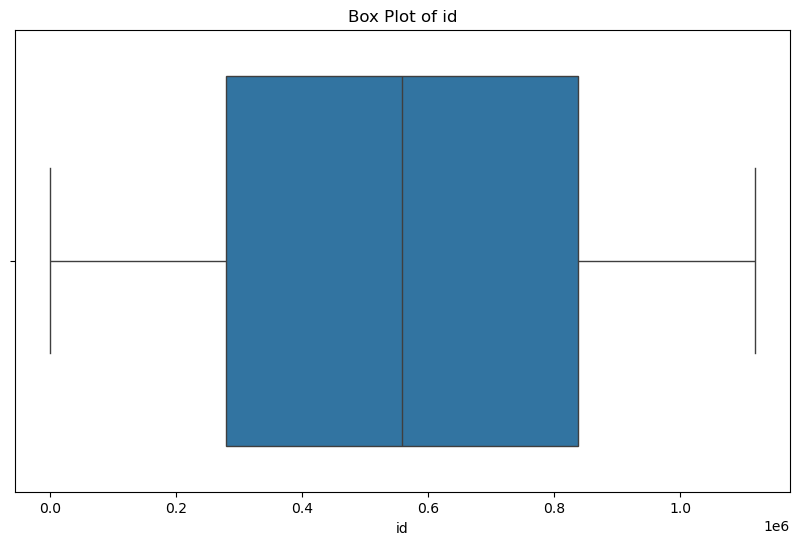

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
    
df_train = pd.read_csv("/Users/fepriyadi/Documents/ML/train_flood.csv")
df_test = pd.read_csv("/Users/fepriyadi/Documents/ML/test_flood.csv")

missing_values = df_train.isnull().sum()
missing_values[missing_values > 0]


plt.figure(figsize=(10,6))
sns.boxplot(x=df_train['id'])
plt.title(f'Box Plot of id')
plt.show()

# see all boxplot of column
# for feature in df_train.columns:
#     plt.figure(figsize=(10,6))
#     sns.boxplot(x=df_train[feature])
#     plt.title(f'Box Plot of {feature}')
#     plt.show()


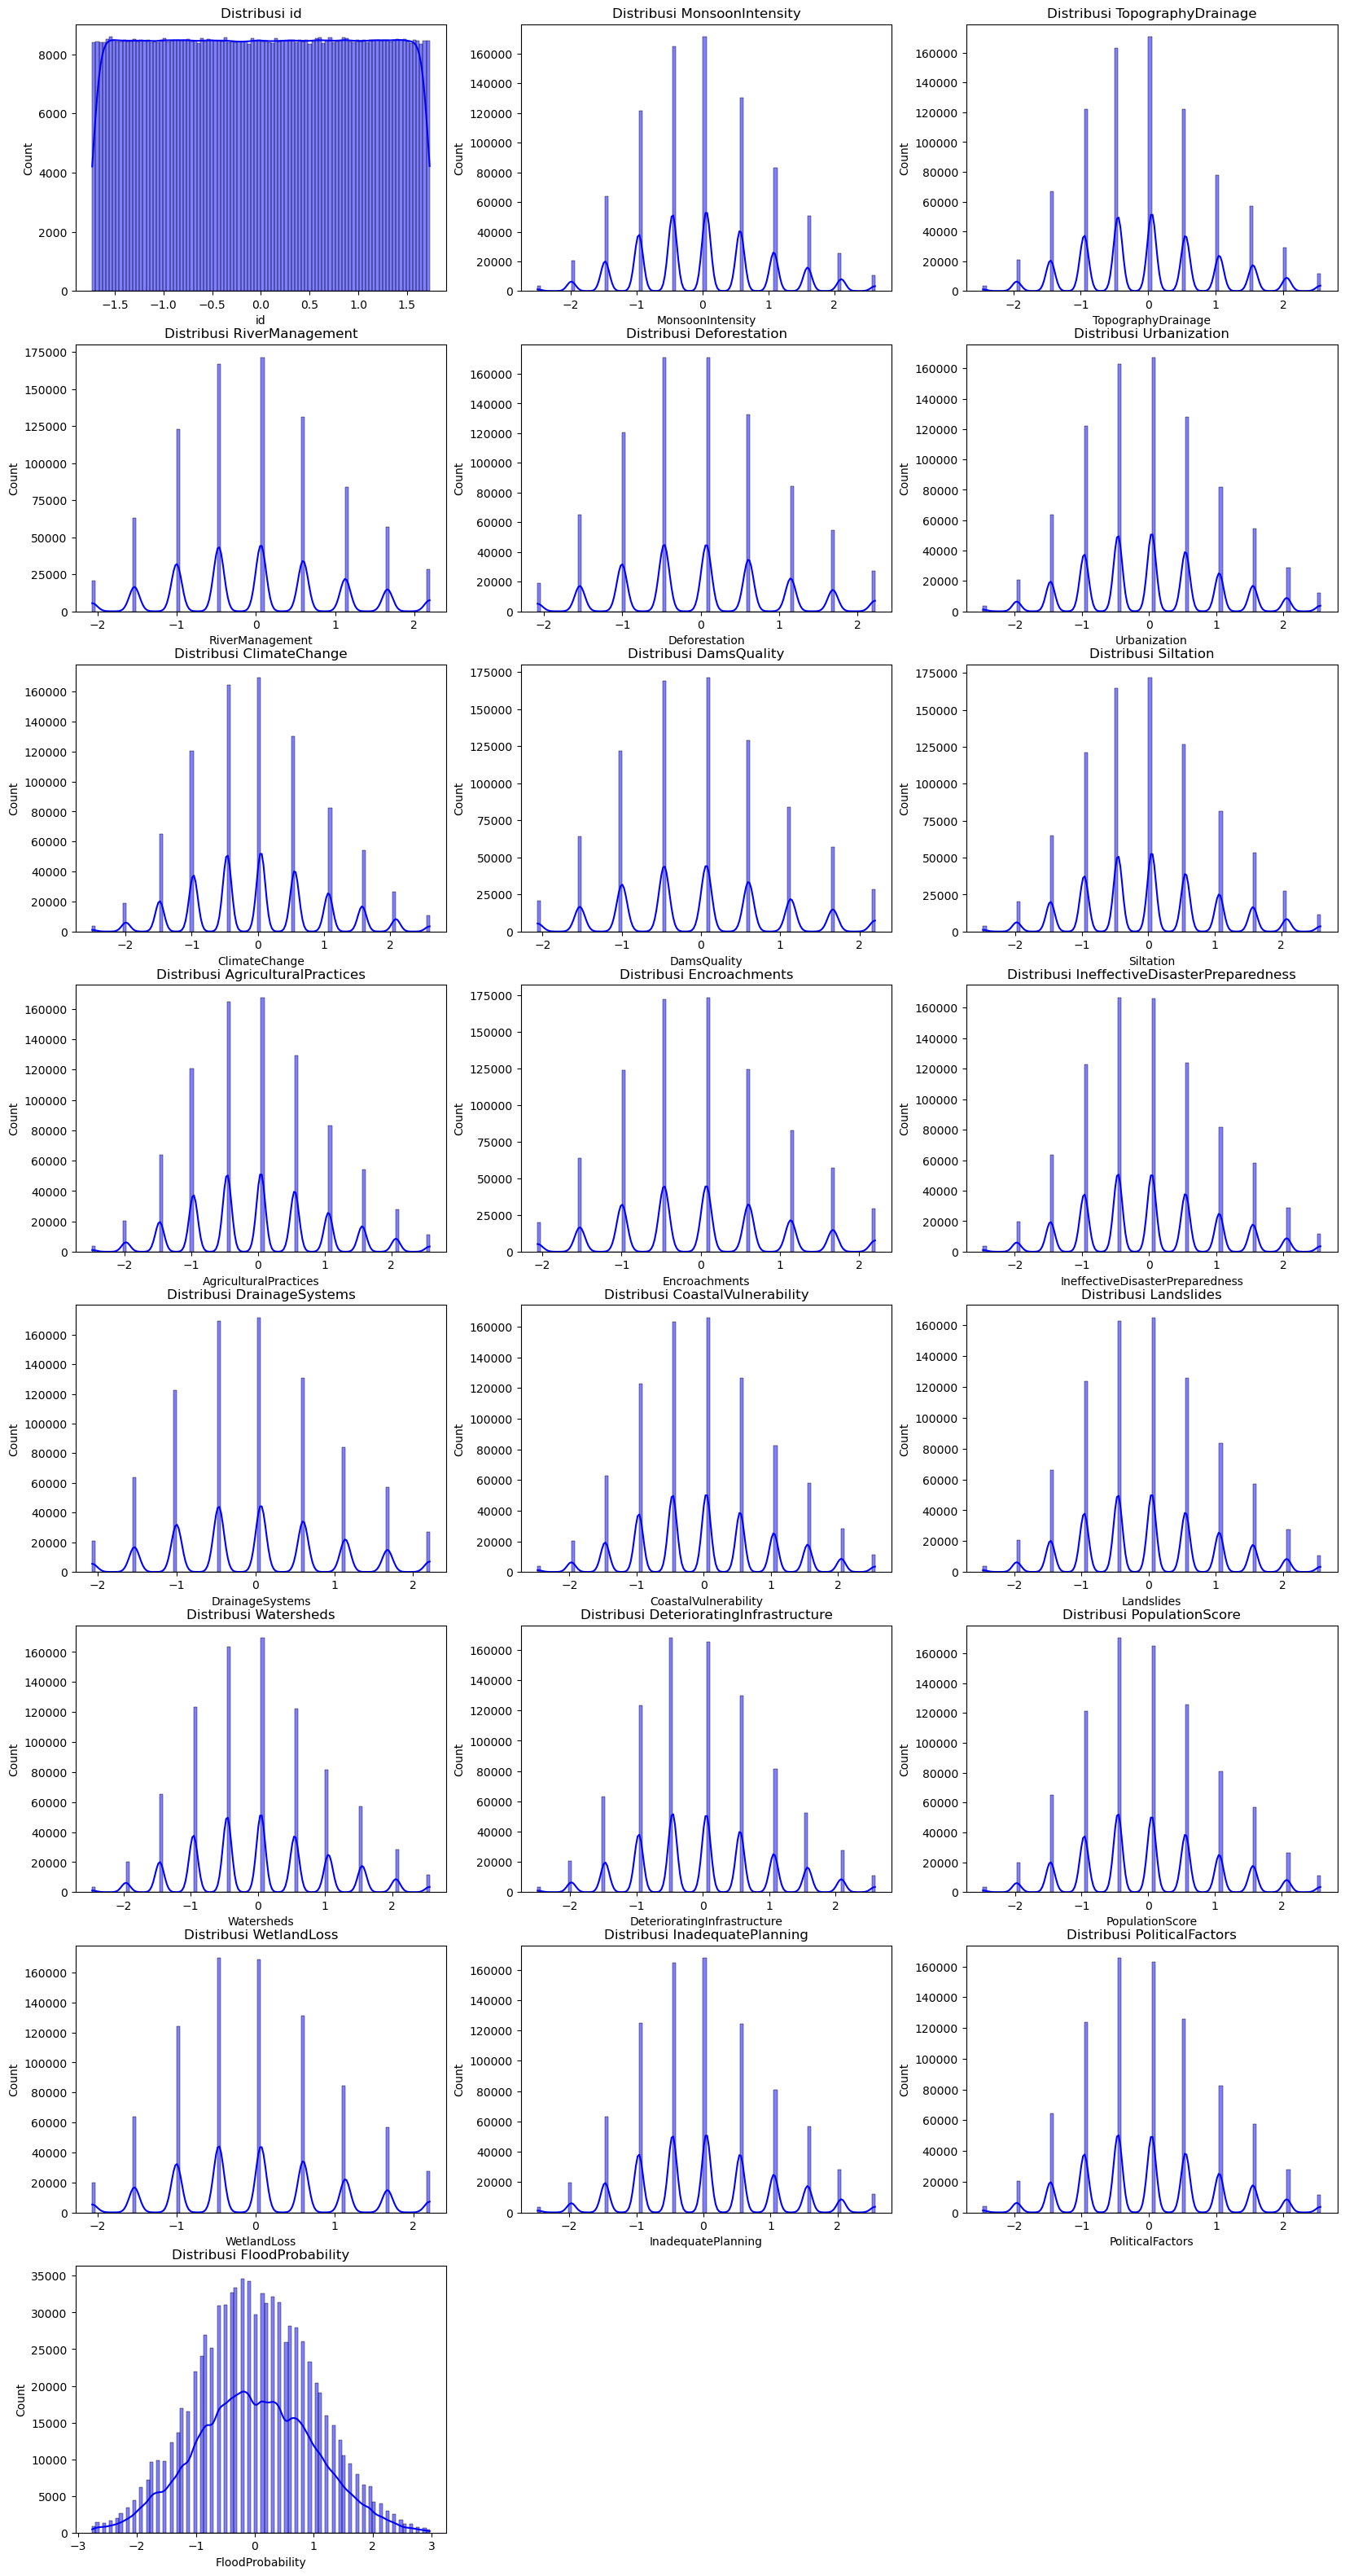

In [ ]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

condition = ~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = df_train.loc[condition, df_train.columns]
numeric_features = df.select_dtypes(include=['number']).columns


scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
n_cols = 3
n_rows = -(-len(numeric_features) // n_cols)  # ceiling division
plt.figure(figsize=(20, n_rows * 5))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=100, kde=True, color='blue')
    plt.title(f'Distribusi {col}')


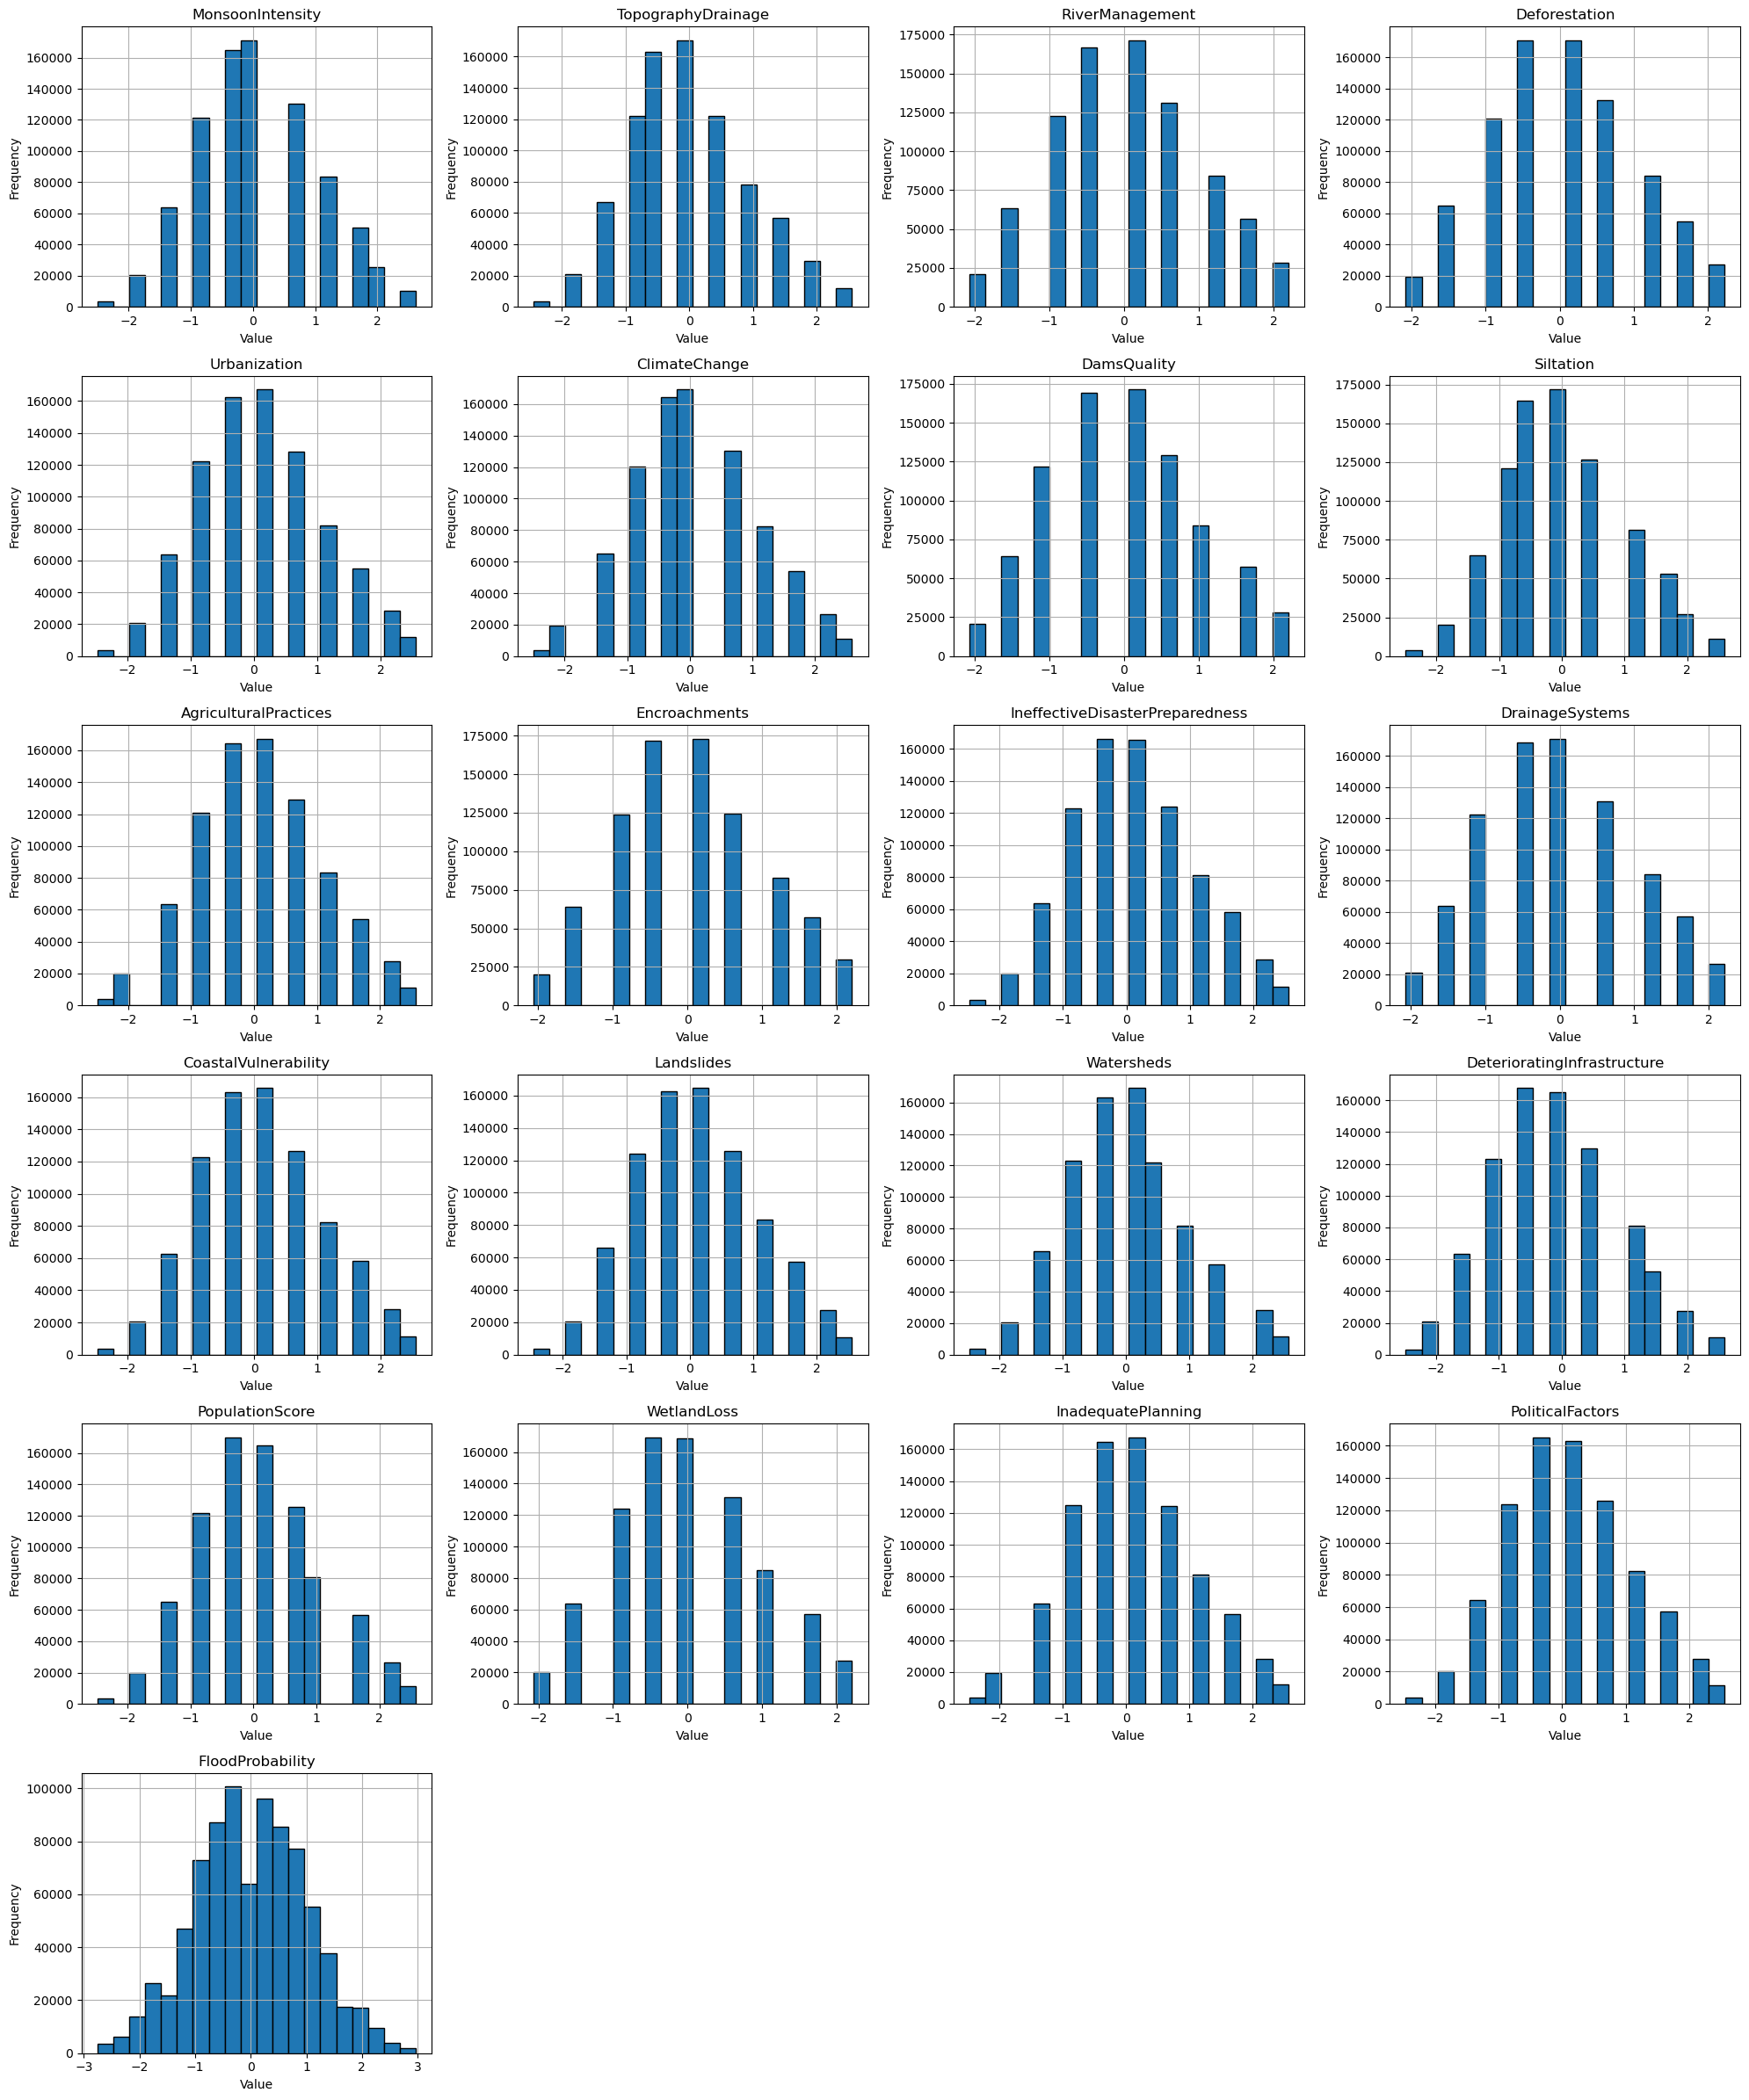

In [44]:
duplicates = df.duplicated()

df.describe(include='all')
num_vars = df.shape[1]

n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))

axes = axes.flatten()

for i, col in enumerate(df.drop(columns=['id']).columns):
    df[col].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

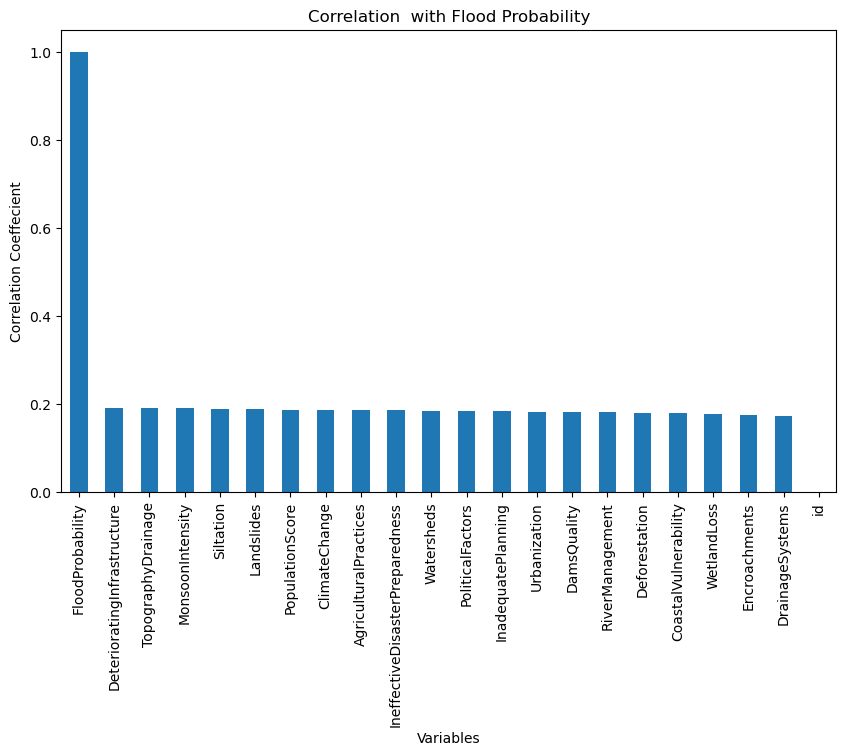

In [46]:
target_corr = df.corr()['FloodProbability']

target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation  with Flood Probability')
plt.xlabel('Variables')
plt.ylabel('Correlation Coeffecient')
plt.show()

In [51]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

pred_lars = lars.predict(x_test)

mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}
 
# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764


In [52]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(x_train, y_train)

pred_LR = LR.predict(x_test)

mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171296,0.828534


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)


pred_GBR = GBR.predict(x_test)

mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171296,0.828534
GradientBoostingRegressor,0.512672,0.380491,0.619132
